In [107]:
# importing ...

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# data

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
X.shape, y.shape

((150, 2), (150,))

In [4]:
np.unique(y)

array([0, 1, 2])

In [5]:
# splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_train)

In [7]:
# model

model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# create a meshgrid to show the boundary

xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

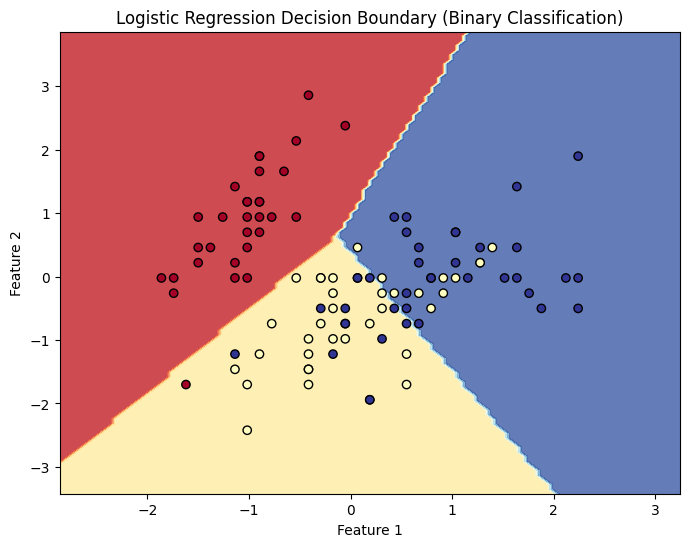

In [9]:
# Plot the decision boundary and data points

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Binary Classification)')
plt.show()

#### from scratch

In [94]:
# data 

X = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7]])
y = np.array([0, 0, 1, 1, 1])

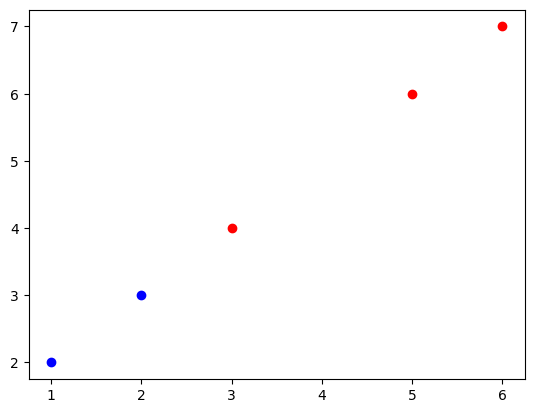

In [95]:
# visualize

X_class0 = X[y == 0]
X_class1 = X[y == 1]

plt.scatter(X_class0[:, 0], X_class0[:, 1], color = "blue")
plt.scatter(X_class1[:, 0], X_class1[:, 1], color = "red")

In [125]:
# setting constraints

learning_rate = 0.001
num_iterations = 10000
num_samples, num_features = X.shape
weights = np.zeros(num_features)
bias = 0

In [126]:
# the sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [127]:
# gradient descent

for i in range(num_iterations):
    model = np.dot(X, weights) + bias
    y_predicted = sigmoid(model)
    
    # error
    error = y_predicted - y
    error_applied_to_features = np.dot(X.T, error)
    
    # gradients
    gradient_weights = (1/num_samples) * error_applied_to_features
    gradient_bias = (1/ num_samples) * np.sum(error)
    
    # adjusting weights and bias
    weights -= learning_rate * gradient_weights
    bias -= learning_rate * gradient_bias
    
    if i% 500 ==0:
        print(weights, bias)

[0.0011 0.0012] 0.0001
[0.16672407 0.12530153] -0.04142254266055429
[0.21846736 0.1090613 ] -0.10940605508375086
[0.26450709 0.0877793 ] -0.17672778816435752
[0.30912967 0.06682566] -0.24230401599815546
[0.35262892 0.0465116 ] -0.3061173238913115
[0.39505297 0.02683503] -0.36821793642368666
[0.43643432 0.00777327] -0.42866105141539695
[ 0.47680479 -0.01069748] -0.4875022703773407
[ 0.51619626 -0.02860068] -0.5447969386377536
[ 0.55464055 -0.04595926] -0.600599809113945
[ 0.59216924 -0.06279553] -0.6549647775177898
[ 0.62881353 -0.07913114] -0.7079446665257942
[ 0.66460406 -0.09498699] -0.7595910528142379
[ 0.69957084 -0.11038329] -0.8099541320706729
[ 0.73374316 -0.12533945] -0.8590826173109578
[ 0.76714953 -0.13987414] -0.9070236660735886
[ 0.7998176  -0.15400523] -0.9538228323736263
[ 0.83177417 -0.16774987] -0.9995240396519843
[ 0.86304513 -0.18112444] -1.0441695713281207


In [128]:
weights

array([ 0.89359489, -0.19411891])

In [129]:
bias

-1.0877138017157344

In [136]:
# try that with sklearn

model = LogisticRegression(max_iter=10000)
model.fit(X, y)

LogisticRegression(max_iter=10000)

In [137]:
model.intercept_

array([-4.0456167])

In [138]:
model.coef_

array([[0.65307676, 0.65305053]])